In This Note Book We will Explore IPL Dataset Insights and Apply Machine Learning Techniques For Predictive Analysis


### **Libraries**

In [145]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from scipy.stats import uniform, randint


### **Loading the Deliveries Dataset (Ball by Ball Information of IPL Matches)**

In [146]:
# loading the dataset
deliveries = pd.read_csv('deliveries.csv')

# checking the first 5 rows of the dataset
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [147]:
# getting info  about the deliveries dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [148]:
# number of rows and columns in the deliveries dataset
print('The number of rows in the deliveries dataset is', deliveries.shape[0], 'and the number of columns is',  deliveries.shape[1])

The number of rows in the deliveries dataset is 260920 and the number of columns is 17


### **Central Tendencies**

In [149]:
# display the values in simple notations'
pd.options.display.float_format = '{:,.2f}'.format

# check for summary statistics of the deliveries dataset
deliveries[['over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket']].describe()

,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,"260,920.00","260,920.00","260,920.00","260,920.00","260,920.00","260,920.00"
mean,9.20,3.62,1.27,0.07,1.33,0.05
std,5.68,1.81,1.64,0.34,1.63,0.22
min,0.00,1.00,0.00,0.00,0.00,0.00
25%,4.00,2.00,0.00,0.00,0.00,0.00
50%,9.00,4.00,1.00,0.00,1.00,0.00
75%,14.00,5.00,1.00,0.00,1.00,0.00
max,19.00,11.00,6.00,7.00,7.00,1.00


On an average, 9.2 overs a team played in an IPL match in which 7 maximum runs were scored in an over and maximum 1 wicket was taken in an over

### **Missing Values**

In [150]:
# check for missing values in the deliveries dataset
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

### **Percentage of Missing Values**

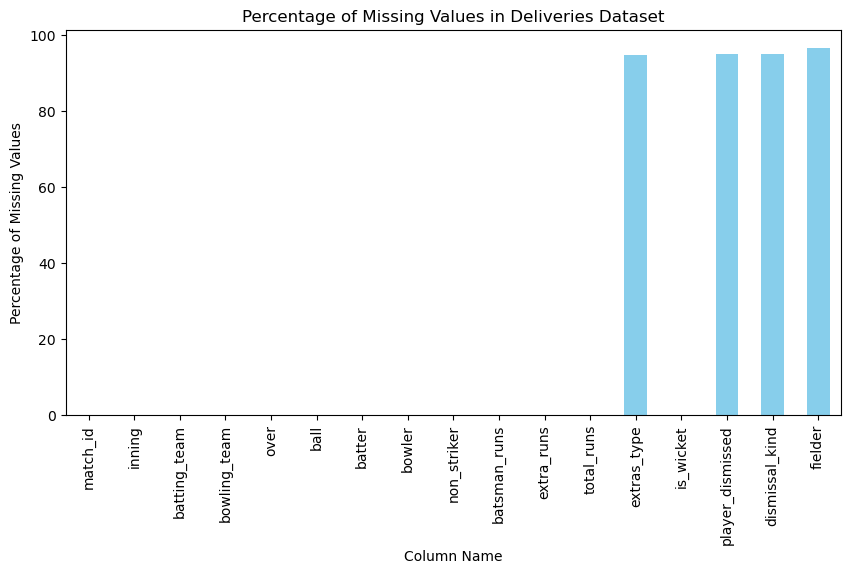

In [151]:
# checking the percentage of missing values in the deliveries dataset
missing_percentage = (deliveries.isnull().sum() / len(deliveries)) * 100
missing_percentage.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Percentage of Missing Values in Deliveries Dataset')
plt.xlabel('Column Name')
plt.ylabel('Percentage of Missing Values')
plt.show()

### **Exploratory Data Analysis (Deliveries Dataset)**

#### **Purpose: To get understanding about the deliveries dataset**

#### ***Questions:Top Scorer Batsman***

In [152]:
# which player scored the most runs in all the seasons?
top_scorer = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
top_scorer.sort_values(by='batsman_runs', ascending=False).head(10)

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


#### ***Questions:Top Bowler***

In [153]:
# which player threw the most overs in all the seasons?
top_bowler = deliveries.groupby('bowler')['over'].count().reset_index()
top_bowler.sort_values(by='over', ascending=False).head(10)

,bowler,over
355,R Ashwin,4679
446,SP Narine,4146
71,B Kumar,4060
348,PP Chawla,3895
373,RA Jadeja,3895
524,YS Chahal,3628
163,Harbhajan Singh,3496
8,A Mishra,3444
119,DJ Bravo,3296
494,UT Yadav,3190


#### ***Questions:Distribution of Extra Types in Deliveries Dataset***

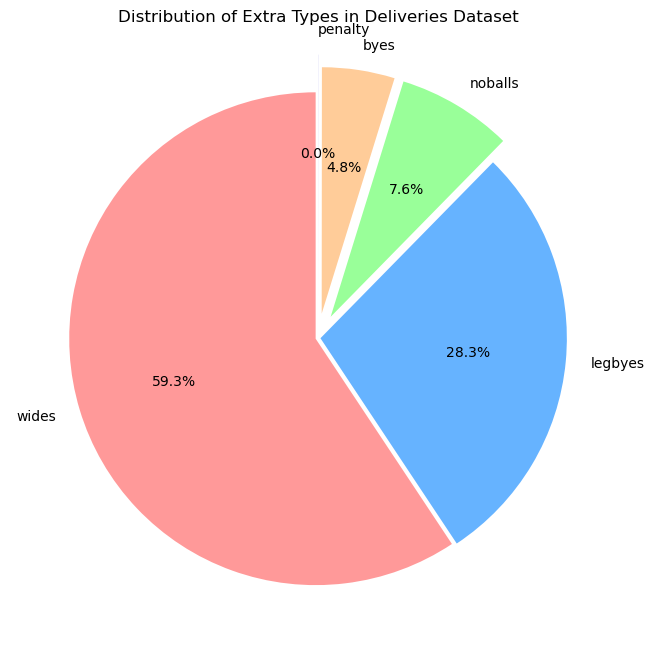

In [154]:
# most of the extra types in the deliveries dataset
extra_types = deliveries['extras_type'].value_counts().reset_index()
extra_types.columns = ['extras_type', 'count']
explode = (0.01, 0.01, 0.1, 0.1, 0.15)  # explode only the first slice

extra_types.set_index('extras_type')['count'].plot(
	kind='pie',
	autopct='%1.1f%%',
	figsize=(8, 8),
	startangle=90,
	explode=explode,
	colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
)
plt.title('Distribution of Extra Types in Deliveries Dataset')
plt.ylabel('')
plt.show()

Most of the extra types in the deliveries dataset were wides with percentage of 59.3%
Second most common extra type was legbyes with percentage of 28.3%

#### ***Questions:Top Bowler Wickets***

In [155]:
# top 5 bowlers who dismissed the most batsmen
top_bowler_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index()
top_bowler_wickets.sort_values(by='is_wicket', ascending=False).head(5)

,bowler,is_wicket
449,YS Chahal,213
104,DJ Bravo,207
301,PP Chawla,201
383,SP Narine,200
308,R Ashwin,198


#### ***Questions:Correlation Matrix***

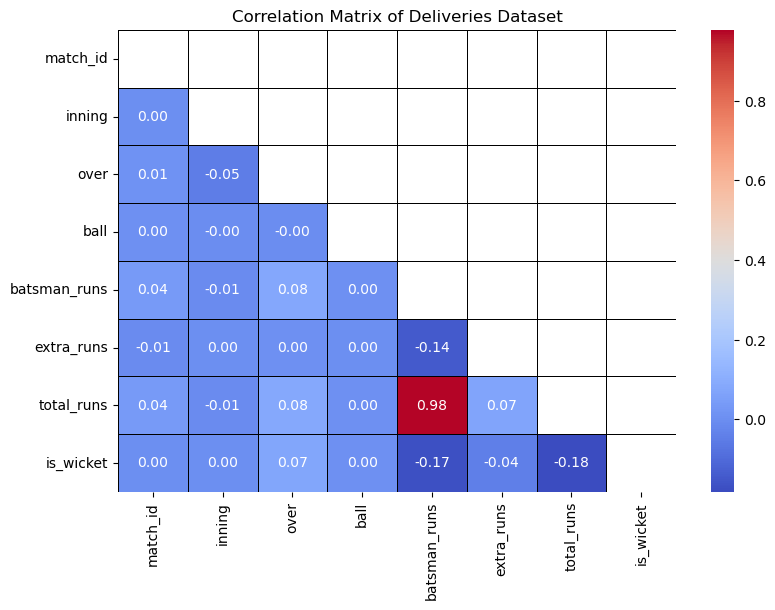

In [156]:
# Calculate correlation matrix (numeric columns only)
corr = deliveries.corr(numeric_only=True)

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot with mask
plt.figure(figsize=(9, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Deliveries Dataset')
plt.show()

Total runs and batsman runs have a strong positive correlation of 0.98 which means batesman runs are directly proportional to total runs.

#### ***Questions:Dismissal Kinds***

In [157]:
# check unique values in dismissal_kind column
dismissal_kinds = deliveries['dismissal_kind'].value_counts()
unique_kinds = deliveries['dismissal_kind'].dropna().unique()
print("Unique values in 'dismissal_kind' column:")
for kind, count in dismissal_kinds.items():
    print(f"{kind}: {count}")


Unique values in 'dismissal_kind' column:
caught: 8063
bowled: 2212
run out: 1114
lbw: 800
caught and bowled: 367
stumped: 358
retired hurt: 15
hit wicket: 15
obstructing the field: 3
retired out: 3


C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\584637413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


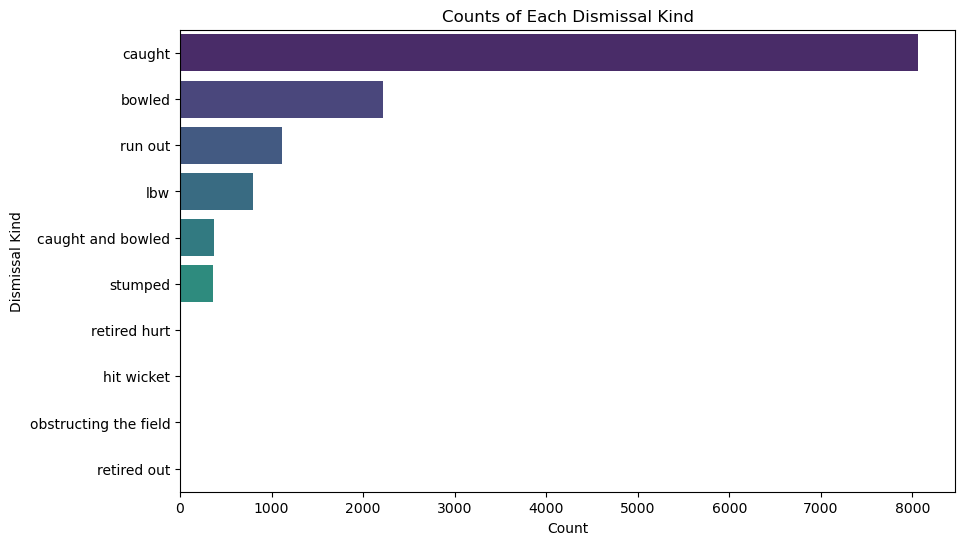

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=dismissal_kinds.values,
    y=dismissal_kinds.index,
    palette='viridis'
)
plt.title('Counts of Each Dismissal Kind')
plt.xlabel('Count')
plt.ylabel('Dismissal Kind')
plt.show()

----


----

### **Loading the Matches Dataset(It gives information about the matches)**

In [159]:
# loading the matches dataset
matches = pd.read_csv('matches.csv')
# checking the first 5 rows of the matches dataset
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.00,241.00,20.00,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.00,130.00,20.00,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.00,166.00,20.00,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.00,111.00,20.00,N,NaN,BF Bowden,K Hariharan


In [160]:
# check for info about the matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [161]:
# check for number of rows and columns in the matches dataset
print('Rows in the matches dataset:', matches.shape[0], 'Columns in the matches dataset:', matches.shape[1])

Rows in the matches dataset: 1095 Columns in the matches dataset: 20


### **Exploratory Data Analysis (Matches Dataset)**

#### **Purpose: To get understanding about the matches dataset**

#### ***Questions:How many seasons data we have?***

In [162]:
# print unique seasons in a visually appealing way
unique_seasons = matches['season'].unique()
print("IPL Seasons Available:\n" + "\n".join(f"• {season}" for season in unique_seasons))

IPL Seasons Available:
• 2007/08
• 2009
• 2009/10
• 2011
• 2012
• 2013
• 2014
• 2015
• 2016
• 2017
• 2018
• 2019
• 2020/21
• 2021
• 2022
• 2023
• 2024


That means we have data from 2007 to 2024 seasons


#### ***Questions:Correlation Matrix of Matches Dataset***

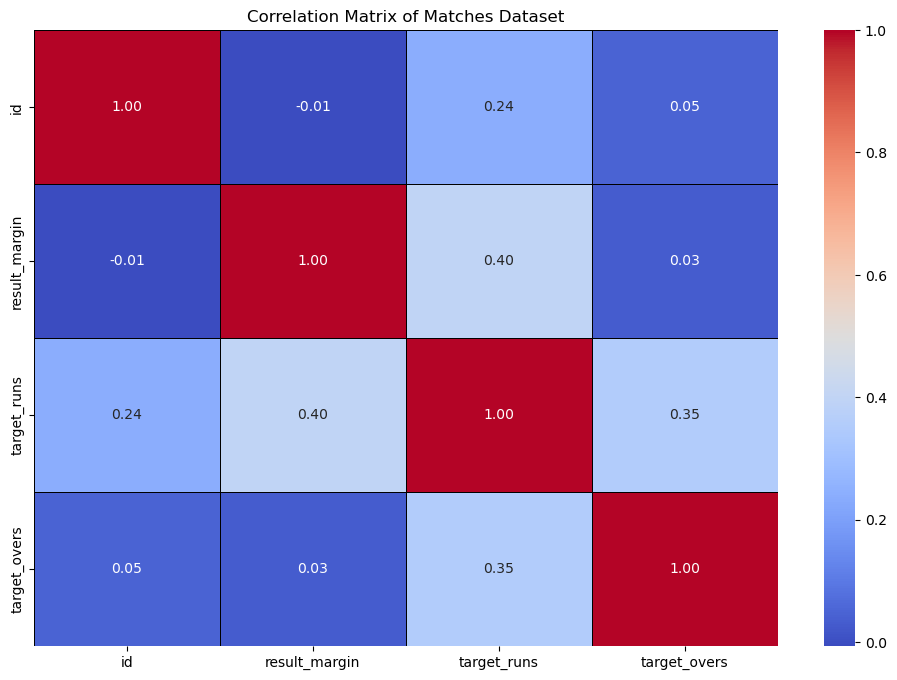

In [163]:
# checking the correlation matrix of the matches dataset
plt.figure(figsize=(12, 8))
sns.heatmap(
    matches.corr(numeric_only=True),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black'   
)
plt.title('Correlation Matrix of Matches Dataset')
plt.show()

result margin and target runs shows some kind of relationship same moderate correlation can be scen between target runs and target overs.

#### ***Questions:Missing Values Heatmap of Matches Dataset***

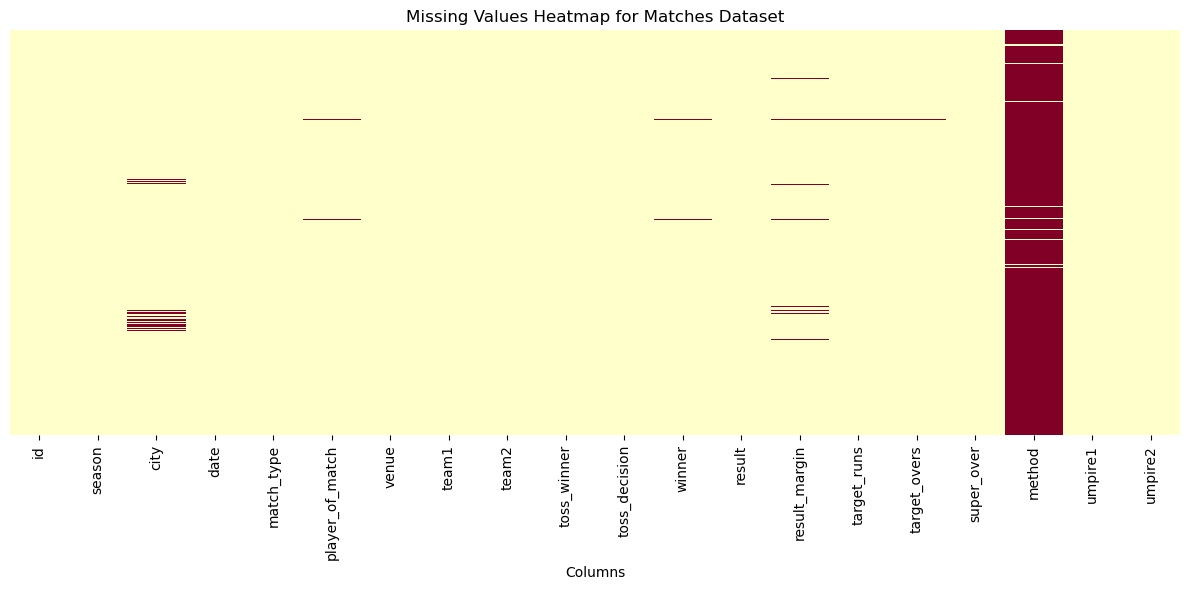

In [164]:
# Calculate missing percentage for matches dataset
missing_percentage_matches = (matches.isnull().sum() / len(matches)) * 100

# Visualize missing values in the matches dataset as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    matches.isnull(),
    cbar=False,
    cmap='YlOrRd',
    yticklabels=False
)
plt.title('Missing Values Heatmap for Matches Dataset')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()


#### ***Questions:How many matches we have overall?***

In [165]:
# checking the count of matches
matches['id'].count()

1095

This means we have data of 1095 matches from 2007-08 to 2024 ipl seasons.

#### ***Questions:How many matches played in each season?***

C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\3362538763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


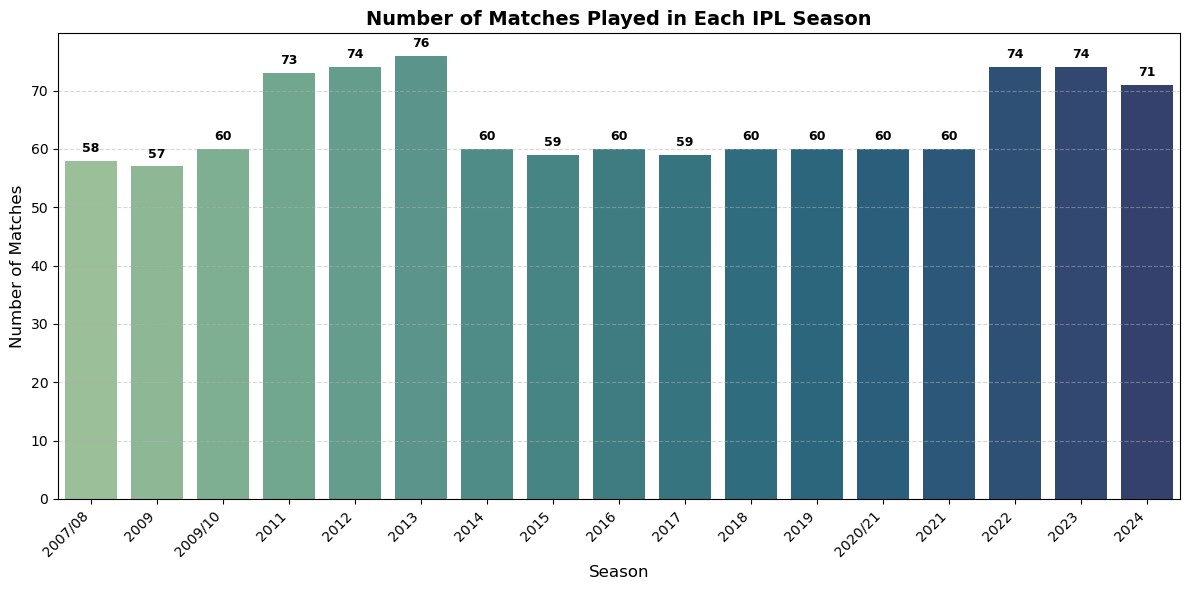

In [166]:
# Number of matches played in each season (optimized and visually appealing)
matches_per_season = matches['season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=matches_per_season.index,
    y=matches_per_season.values,
    palette='crest'
)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Number of Matches Played in Each IPL Season', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(matches_per_season.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.show()

#### ***Questions:In the IPL, how many cities hosted matches?***

In [167]:
# how many cities hosted IPL matches
num_cities = matches['city'].nunique()
print(f'The number of cities that hosted IPL matches is: {num_cities}')

The number of cities that hosted IPL matches is: 36


#### ***Questions: Which city hosted the most IPL matches?***

C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\3270218792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


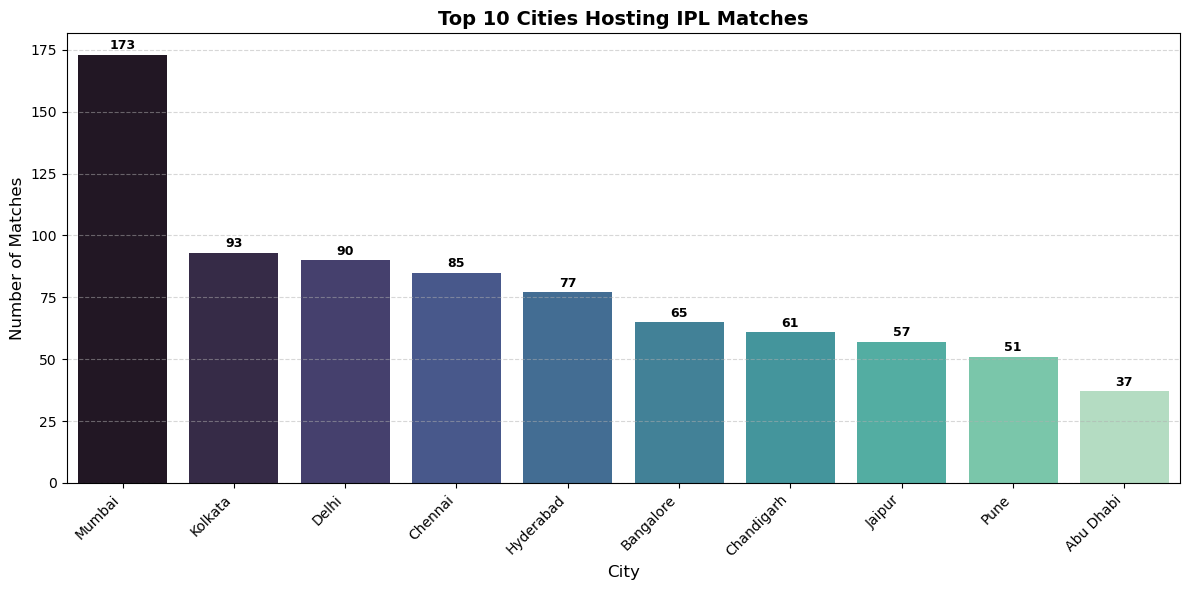

In [168]:
# which city host most matches
matches_per_city = matches['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=matches_per_city.index,
    y=matches_per_city.values,
    palette='mako'
)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Top 10 Cities Hosting IPL Matches', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(matches_per_city.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.show()


Mumbai hosted the most IPL matches with 173 matches.

#### ***Questions: Top 5 IPL Teams with Most IPL Matches?***

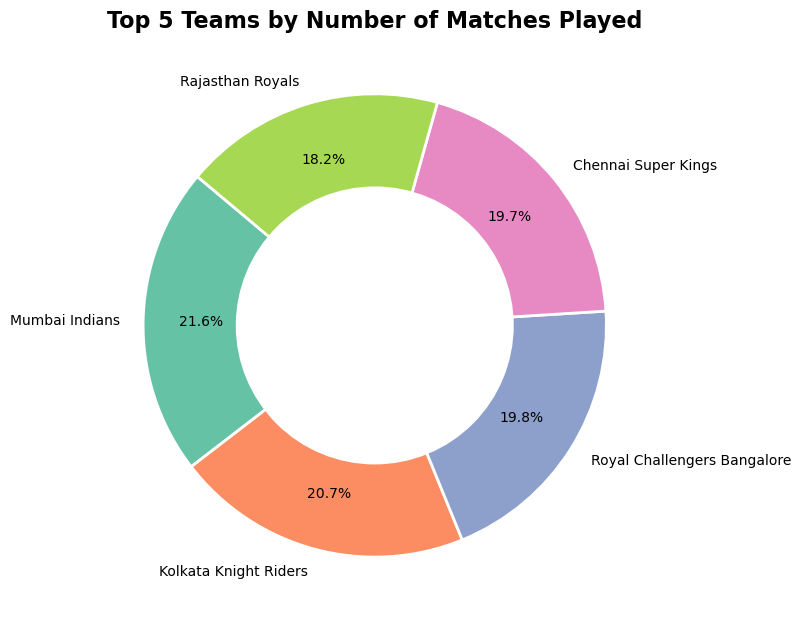

In [169]:
# Calculate matches played by each team if not already defined
matches_per_team = (
    pd.concat([
        matches['team1'],
        matches['team2']
    ])
    .value_counts()
    .reset_index()
)
matches_per_team.columns = ['team', 'number_of_matches']

# Get top 5 teams by number of matches played
top5_teams = matches_per_team.sort_values(by='number_of_matches', ascending=False).head(5)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top5_teams['number_of_matches'],
    labels=top5_teams['team'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2', n_colors=5),
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    pctdistance=0.75  # Move percentage labels closer to the edge
)
# Draw a white circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 5 Teams by Number of Matches Played', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


#### ***Questions: Which team has won least matches?***

In [170]:
# which team has won least matches
least_wins_team = matches['winner'].value_counts().idxmin()
least_wins_count = matches['winner'].value_counts().min()
print(f'The team with the least wins is {least_wins_team} with {least_wins_count} wins.')

The team with the least wins is Rising Pune Supergiants with 5 wins.


#### ***Questions: Which team has won most matches?***

In [171]:
# which team has won most matches
most_wins_team = matches['winner'].value_counts().idxmax()
most_wins_count = matches['winner'].value_counts().max()
print(f'The team with the most wins is {most_wins_team} with {most_wins_count} wins.')

The team with the most wins is Mumbai Indians with 144 wins.


#### ***Questions: Total Wins by Each Team***

C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\3945824622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


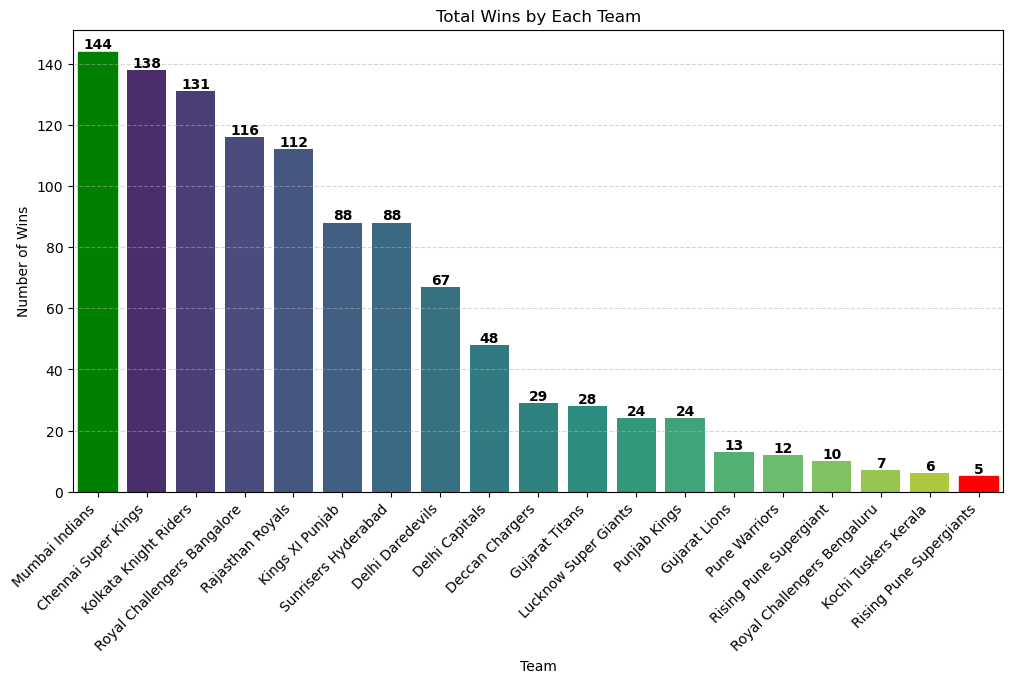

In [172]:

# Count wins per team
win_counts = matches['winner'].value_counts()

# Identify teams with most and least wins
most_wins_team = win_counts.idxmax()
most_wins_count = win_counts.max()

least_wins_team = win_counts.idxmin()
least_wins_count = win_counts.min()

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=win_counts.index,
    y=win_counts.values,
    palette='viridis'
)

# Annotate counts on top of bars
for bar, count in zip(bars.patches, win_counts.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{count}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# Highlight most and least wins in different colors
for bar, team in zip(bars.patches, win_counts.index):
    if team == most_wins_team:
        bar.set_color('green')
    if team == least_wins_team:
        bar.set_color('red')

plt.title('Total Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#### ***Questions: Matches Type in IPL***

In [173]:
# check unique vaalues in match_type column
match_types = matches['match_type'].unique()
print("Unique values in 'match_type' column:")
for match_type in match_types:
    print(f"• {match_type}")

Unique values in 'match_type' column:
• League
• Semi Final
• Final
• 3rd Place Play-Off
• Qualifier 1
• Elimination Final
• Qualifier 2
• Eliminator


#### ***Questions: Final Matches Played by Each Team***

C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\368176908.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


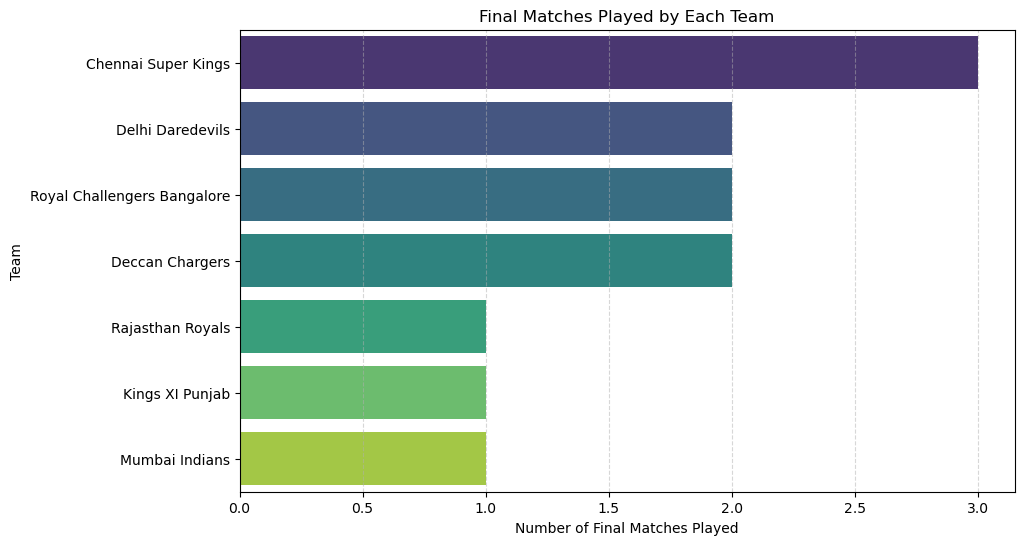

In [174]:
# Filter only 'Final' matches
final_matches = matches[matches['match_type'] == 'Semi Final']

# Combine team1 and team2, count appearances
team_counts = pd.concat([final_matches['team1'], final_matches['team2']]).value_counts()

# Plotting the number of final matches played by each team
plt.figure(figsize=(10, 6))
sns.barplot(
    x=team_counts.values,
    y=team_counts.index,
    palette='viridis'
)
plt.title('Final Matches Played by Each Team')
plt.xlabel('Number of Final Matches Played')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


#### ***Questions: Which team has won most finals?***

In [175]:
# Filter only 'Final' matches
final_matches = matches[matches['match_type'] == 'Final']

# Count wins in finals
final_wins = final_matches['winner'].value_counts()

# Get the team with the most final wins
most_final_wins_team = final_wins.idxmax()
most_final_wins_count = final_wins.max()

most_final_wins_team, most_final_wins_count

print(f'The team with the most final wins is {most_final_wins_team} with {most_final_wins_count} wins in finals.')


The team with the most final wins is Chennai Super Kings with 5 wins in finals.


#### ***Questions: Season Winners***

In [176]:
# Show which team won in which season
season_winners = matches[matches['match_type'] == 'Final'][['season', 'winner']]
print(season_winners.reset_index(drop=True))


     season                 winner
0   2007/08       Rajasthan Royals
1      2009        Deccan Chargers
2   2009/10    Chennai Super Kings
3      2011    Chennai Super Kings
4      2012  Kolkata Knight Riders
5      2013         Mumbai Indians
6      2014  Kolkata Knight Riders
7      2015         Mumbai Indians
8      2016    Sunrisers Hyderabad
9      2017         Mumbai Indians
10     2018    Chennai Super Kings
11     2019         Mumbai Indians
12  2020/21         Mumbai Indians
13     2021    Chennai Super Kings
14     2022         Gujarat Titans
15     2023    Chennai Super Kings
16     2024  Kolkata Knight Riders


#### ***Questions: Top 10 Teams with Most Seasons Won***

C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\1652834225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


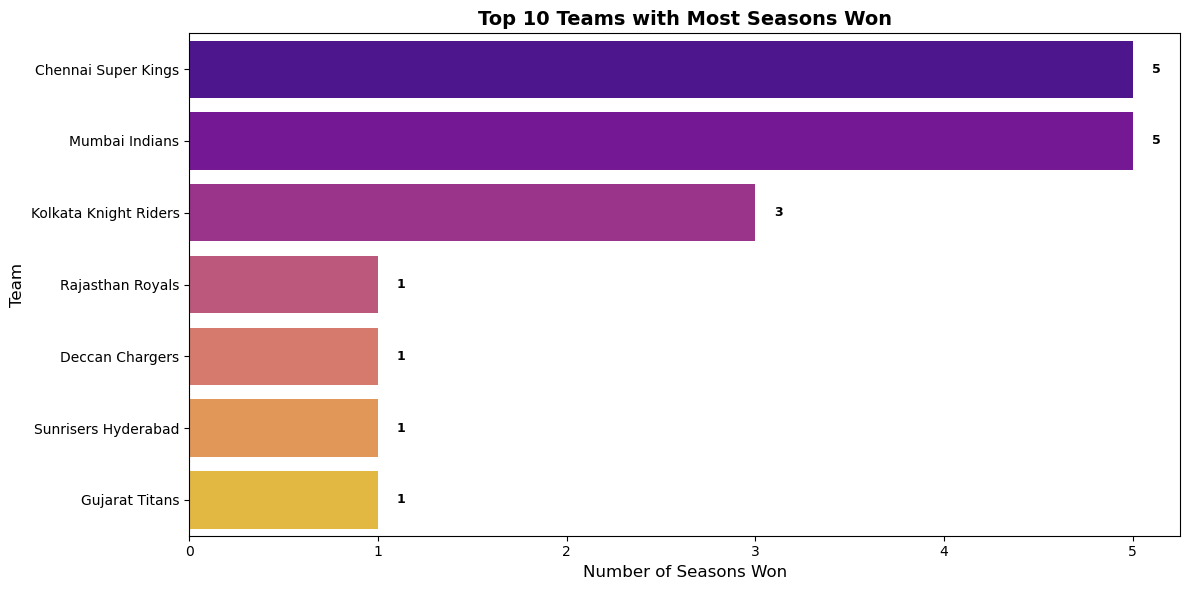

In [177]:
# which team has won most seasons
season_wins = season_winners['winner'].value_counts().reset_index()
season_wins.columns = ['team', 'number_of_seasons_won']
top_season_winner = season_wins.sort_values(by='number_of_seasons_won', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_season_winner['number_of_seasons_won'],
    y=top_season_winner['team'],
    palette='plasma'
)
plt.xlabel('Number of Seasons Won', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Top 10 Teams with Most Seasons Won', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
for i, v in enumerate(top_season_winner['number_of_seasons_won']):
    plt.text(v + 0.1, i, str(v), va='center', fontsize=9, fontweight='bold')
plt.show()

#### ***Questions: Summary Statistics of Target Runs***

In [178]:
# checking the summary statistics of target runs
matches['target_runs'].describe()


count   1,092.00
mean      165.68
std        33.43
min        43.00
25%       146.00
50%       166.00
75%       187.00
max       288.00
Name: target_runs, dtype: float64

On an average target runs are 165 where as the maximum are 288.

#### ***Question: Which team has highest and lowest target runs***

In [179]:
# team with highest target runs
highest_target_team = matches.loc[matches['target_runs'].idxmax(), ['team1', 'team2']]
highest_target_runs = matches['target_runs'].max()
print(f'The team with the highest target runs is {highest_target_team["team1"]} vs {highest_target_team["team2"]} with {highest_target_runs} runs. \n')
# team with lowest target runs
lowest_target_team = matches.loc[matches['target_runs'].idxmin(), ['team1', 'team2']]
lowest_target_runs = matches['target_runs'].min()
print(f'The team with the lowest target runs is {lowest_target_team["team1"]} vs {lowest_target_team["team2"]} with {lowest_target_runs} runs.')

The team with the highest target runs is Sunrisers Hyderabad vs Royal Challengers Bengaluru with 288.0 runs. 

The team with the lowest target runs is Delhi Daredevils vs Sunrisers Hyderabad with 43.0 runs.


#### ***Questions: Which team has highest and lowest win margin?***

In [180]:
# which team has made the highest win margin (by runs or wickets) in IPL history
highest_score_team = matches.loc[matches['result_margin'].idxmax(), ['team1', 'team2']]
highest_score_runs = matches['result_margin'].max()
print(f'The match with the highest win margin in IPL history is {highest_score_team["team1"]} vs {highest_score_team["team2"]} with a margin of {highest_score_runs}.\n')

# which team has the lowest win margin (excluding 0)
lowest_margin = matches['result_margin'][matches['result_margin'] > 0].min()
lowest_score_team = matches.loc[matches['result_margin'] == lowest_margin, ['team1', 'team2']].iloc[0]
print(f'The match with the lowest win margin in IPL history is {lowest_score_team["team1"]} vs {lowest_score_team["team2"]} with a margin of {lowest_margin}.')

The match with the highest win margin in IPL history is Delhi Daredevils vs Mumbai Indians with a margin of 146.0.

The match with the lowest win margin in IPL history is Mumbai Indians vs Kings XI Punjab with a margin of 1.0.


### **Data Cleaning**

#### ***Dealing with Missing Values in Matches Dataset***

In [181]:
# missing values in matches dataset
missing_values = matches.isna().sum()
missing_values[missing_values>0]

city                 51
player_of_match       5
winner                5
result_margin        19
target_runs           3
target_overs          3
method             1074
dtype: int64

In [182]:
# filter matches with missing winner values 
matches[matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.00,20.00,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.00,5.00,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [183]:
# dropping rows with missing values in the 'winner' column
matches = matches.dropna(subset=['winner'])

As we have to drop these rows where winner is missing because there is no enough data to impute it.

In [184]:
# now again checking the missing values in the matches dataset
missing_values_after = matches.isna().sum()
missing_values_after[missing_values_after > 0]

city               51
result_margin      14
method           1069
dtype: int64

In [185]:
# check the rows where result_margin is missing
matches[matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.00,20.00,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.00,20.00,Y,NaN,K Hariharan,DJ Harper
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.00,20.00,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.00,20.00,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.00,20.00,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.00,20.00,Y,NaN,M Erasmus,S Ravi
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.00,20.00,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,2019,Delhi,2019-03-30,League,PP Shaw,Arun Jaitley Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,tie,NaN,186.00,20.00,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,2019,Mumbai,2019-05-02,League,JJ Bumrah,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,163.00,20.00,Y,NaN,CK Nandan,S Ravi
757,1216493,2020/21,NaN,2020-09-20,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,158.00,20.00,Y,NaN,AK Chaudhary,Nitin Menon


As these matches tie so there is no result margin to impute the nan in them we can replace nan with match tied


In [186]:
# replace the nan in result_margin with 'match tied'
matches['result_margin'] = matches['result_margin'].fillna('match tied')

In [187]:
# printinng the rows where city is missing
matches[matches['city'].isna()] 

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.00,146.00,20.00,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.00,116.00,20.00,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.00,167.00,20.00,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.00,192.00,20.00,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.00,194.00,20.00,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.00,141.00,20.00,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.00,151.00,20.00,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.00,185.00,20.00,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.00,142.00,20.00,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.00,126.00,20.00,N,NaN,Aleem Dar,VA Kulkarni


So mainly the matches played in Dubai and Sharjah have missing city values so we will impute them based on known venue values

In [188]:
# Fill missing city based on known venue values
matches.loc[
    (matches['city'].isna()) & (matches['venue'] == 'Sharjah Cricket Stadium'),
    'city'
] = 'Sharjah'

matches.loc[
    (matches['city'].isna()) & (matches['venue'] == 'Dubai International Cricket Stadium'),
    'city'
] = 'Dubai'

# Optional: check if any missing city values remain
print("Remaining missing cities:", matches['city'].isna().sum())

Remaining missing cities: 0


In [189]:
# again checking the missing values in the matches dataset
missing_values_after = matches.isna().sum()
missing_values_after[missing_values_after > 0]

method    1069
dtype: int64

So we have left with missing values in method column which we are not going to use during our modelbuilding so droping it will be a good option

In [190]:
# droping the 'method' column as it has missing values and is not needed for model building
matches = matches.drop(columns=['method'])

----

----

In [191]:
# checking the unique values in team1 and team2 columns
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [192]:
matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

-----

------

### ***Question: Getting Insights about Winning Percentage***

In [193]:
# Combine both 'team1' and 'team2' columns into a single Series
# This gives us a complete list of all teams participating in every match
matches_played = pd.concat([matches['team1'], matches['team2']], axis=0)

# Count how many times each team appears (i.e., number of matches played)
# Since each match has both team1 and team2, this counts total participations
matches_played = matches_played.value_counts().reset_index()

# Rename the columns for better readability
matches_played.columns = ['Teams', 'Total Matches Played']


In [194]:
# Calculate number of matches won by each team
wins = matches['winner'].value_counts().reset_index()
wins.columns = ['Teams', 'Wins']

In [195]:
# Merge total matches played and wins
matches_played = matches_played.merge(wins, on='Teams', how='left')
matches_played['Wins'] = matches_played['Wins'].fillna(0).astype(int)

In [196]:
# Calculate win percentage
matches_played['Win Percentage'] = matches_played['Wins'] / matches_played['Total Matches Played'] * 100

matches_played

,Teams,Total Matches Played,Wins,Win Percentage
0,Mumbai Indians,261,144,55.17
1,Kolkata Knight Riders,251,131,52.19
2,Royal Challengers Bangalore,237,116,48.95
3,Chennai Super Kings,237,138,58.23
4,Rajasthan Royals,219,112,51.14
5,Kings XI Punjab,190,88,46.32
6,Sunrisers Hyderabad,182,88,48.35
7,Delhi Daredevils,159,67,42.14
8,Delhi Capitals,91,48,52.75
9,Deccan Chargers,75,29,38.67


#### ***Questions: Visualizing Winning Percentage***

C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\2334249569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\2334249569.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\2334249569.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\2334249569.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

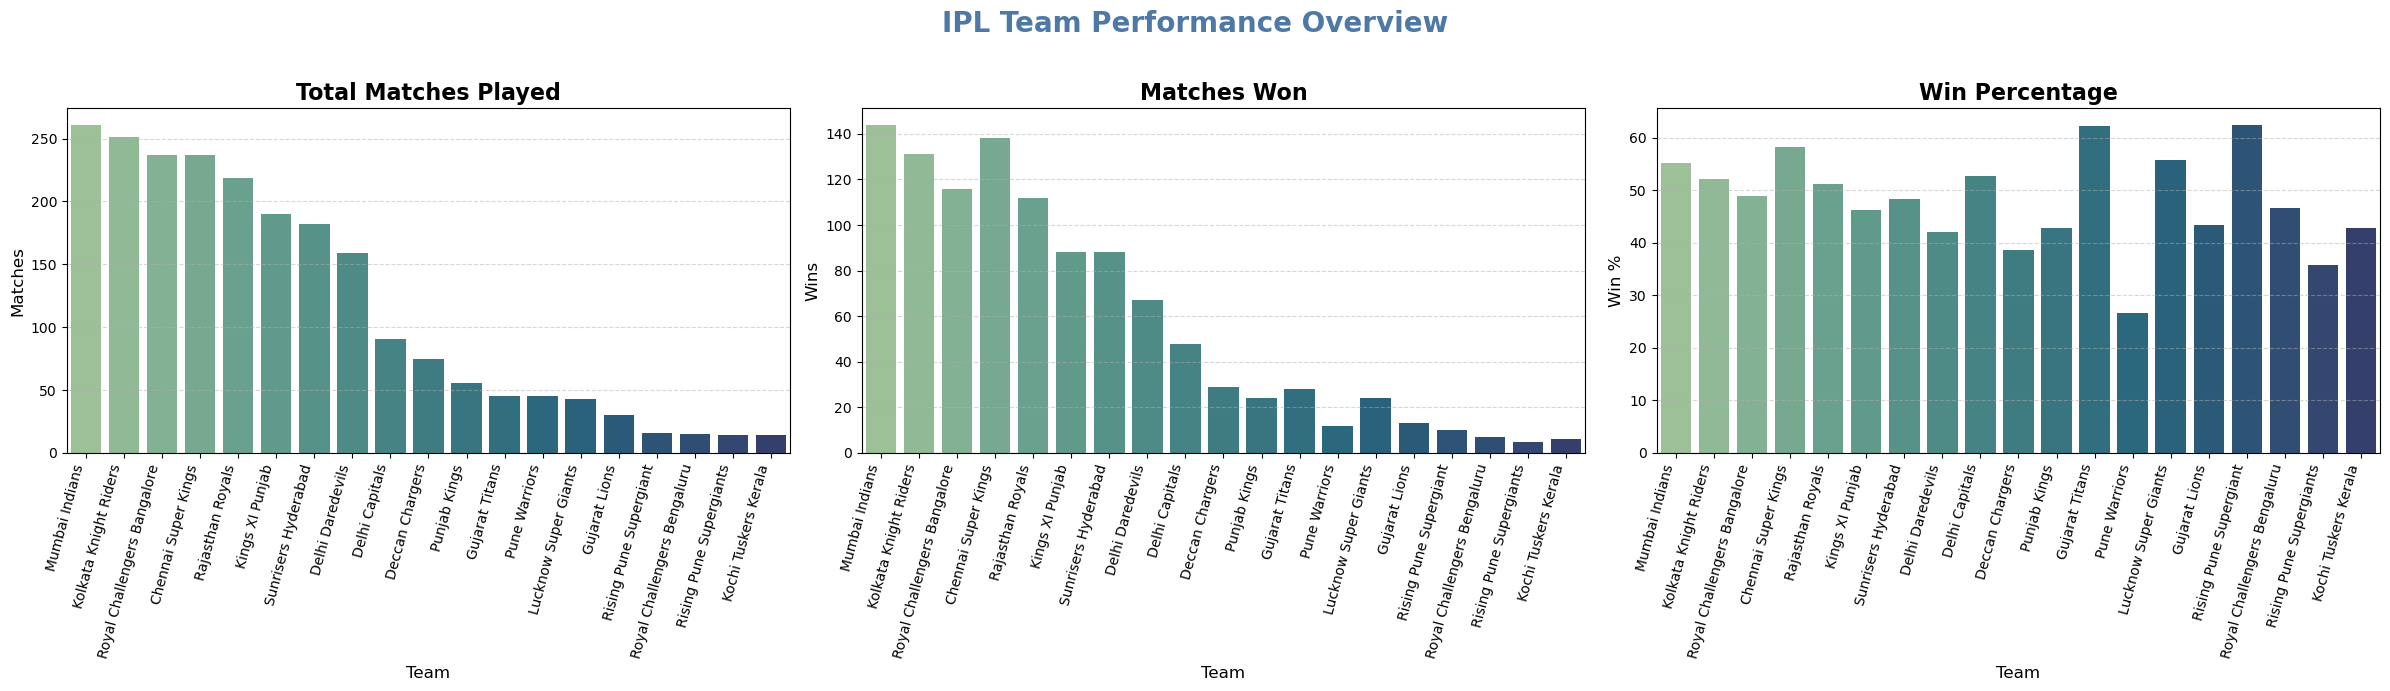

In [197]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7))
bar_colors = sns.color_palette('crest', n_colors=len(matches_played))

# Total Matches Played
sns.barplot(
    x='Teams', y='Total Matches Played', data=matches_played,
    ax=axes[0], palette=bar_colors
)
axes[0].set_title('Total Matches Played', fontsize=16, weight='bold')
axes[0].set_xlabel('Team', fontsize=12)
axes[0].set_ylabel('Matches', fontsize=12)
axes[0].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Matches Won
sns.barplot(
    x='Teams', y='Wins', data=matches_played,
    ax=axes[1], palette=bar_colors
)
axes[1].set_title('Matches Won', fontsize=16, weight='bold')
axes[1].set_xlabel('Team', fontsize=12)
axes[1].set_ylabel('Wins', fontsize=12)
axes[1].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Win Percentage
sns.barplot(
    x='Teams', y='Win Percentage', data=matches_played,
    ax=axes[2], palette=bar_colors
)
axes[2].set_title('Win Percentage', fontsize=16, weight='bold')
axes[2].set_xlabel('Team', fontsize=12)
axes[2].set_ylabel('Win %', fontsize=12)
axes[2].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('IPL Team Performance Overview', fontsize=20, weight='bold', color='#4E79A7')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### ***Questions: Toss Winner Effect on Match Outcome***

C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\3059162522.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({
C:\Users\TECH\AppData\Local\Temp\ipykernel_11240\3059162522.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


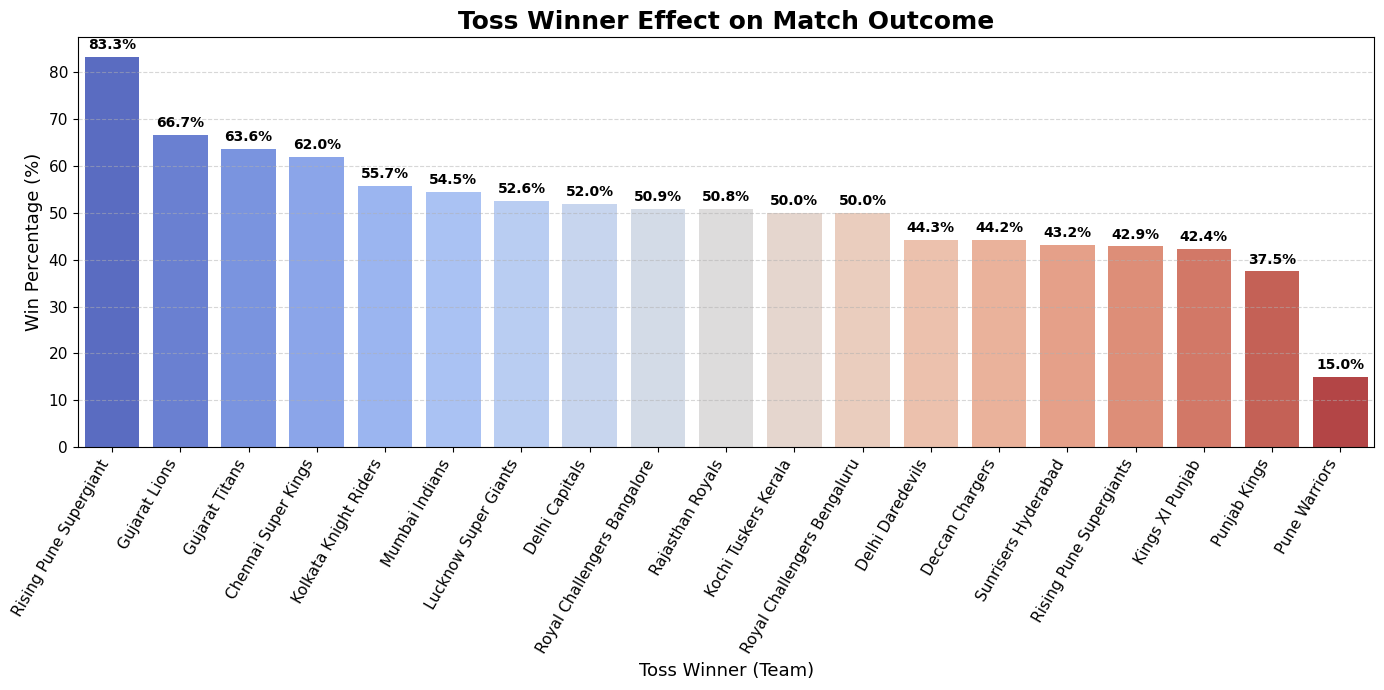

In [198]:
# Calculate toss winner stats if not already defined
toss_winner_stats = (
    matches.groupby('toss_winner')
    .apply(lambda x: pd.Series({
        'TossWinAndMatchWin': (x['toss_winner'] == x['winner']).sum(),
        'Total Matches': len(x)
    }))
    .reset_index()
)
toss_winner_stats['Win Percentage'] = toss_winner_stats['TossWinAndMatchWin'] / toss_winner_stats['Total Matches'] * 100

# Sort by Win Percentage for better readability
toss_winner_stats_sorted = toss_winner_stats.sort_values(by='Win Percentage', ascending=False)

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x='toss_winner',
    y='Win Percentage',
    data=toss_winner_stats_sorted,
    palette='coolwarm'
)
plt.title('Toss Winner Effect on Match Outcome', fontsize=18, weight='bold')
plt.xlabel('Toss Winner (Team)', fontsize=13)
plt.ylabel('Win Percentage (%)', fontsize=13)
plt.xticks(rotation=60, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with win percentage values
for i, v in enumerate(toss_winner_stats_sorted['Win Percentage']):
    barplot.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

----

### **Senario: 1 - Predict the Match Outcome at Any Instance After the First Innings**

****

> ### **Applying Techniques of Data Manuipulation and Feature Engineering to the Deliveries and Matches DataFrames for Feature Extraction**

In [199]:
# creating copies of the csv files to avoid modifying the original data
deliveries = deliveries.copy()
matches = matches.copy()

#### **column renaming of the matches DataFrame**

In [200]:
# rename the 'id' column to 'match_id' for consistency
matches.rename(columns={'id': 'match_id'}, inplace=True)
matches.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.00,241.00,20.00,N,MR Benson,SL Shastri


### **Data Preprocessing**

#### **Dealing Anamoly in Team Names**

In [201]:
# Check unique values in 'team1' column
matches['team1'].unique()


array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

#### **Team Name Standardization and Replacement**


In [202]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in team columns
matches[team_columns] = matches[team_columns].replace(team_name_mapping)

### **Replacing the team names in the 'batting_team' and 'bowling_team' columns**

In [203]:
# Replace the team names in the 'batting_team' column
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_mapping)


deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [204]:
# cities that hosted IPL matches
matches['city'].unique()


array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

#### **Dealing anamoly in city name**

In [205]:
# Replace city names
map_city_names = {'Bengaluru': 'Bangalore'}
matches['city'] = matches['city'].replace(map_city_names)

matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

### **combining the deliveris and matches data**

In [206]:

# Now merging the deliveries data with the matches data
final = matches.merge(deliveries, on='match_id')
final.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### **Doing Some More Feature Engineering**

#### **Filtering the Second Innings Data**

In [207]:
# filtering the second innings data
second_innigs = final[final['inning'] == 2]

#### **Adding the new column current_score based on the second innings data**

In [208]:
# Add 'current_score' which shows runs scored after each delivery
final['current_score'] = final.groupby('match_id')['total_runs'].cumsum()
final.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1


### **Introducing the new column `runs_left` based on target and current_score**

In [209]:
# Calculate runs remaining for each match 
runs_remaining = final['target_runs'] - final['current_score']
# Ensure runs_remaining is non-negative
runs_remaining = runs_remaining.clip(lower=0)  

# Assign to new column
final['runs_left'] = runs_remaining

# Show first 2 rows
final.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,1,1,legbyes,0,NaN,NaN,NaN,1,222.00
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,0,0,NaN,0,NaN,NaN,NaN,1,222.00


### **Adding a new column balls_left**

In [210]:

# Calculate total balls bowled so far in the match
balls_bowled = final['over'] * 6 + final['ball'] 

# calculate balls remaining  
balls_remaining = 120 - balls_bowled 
# Ensure balls_remaining is non-negative                 
balls_remaining = balls_remaining.clip(lower=0)       

# Assign to new column
final['balls_left'] = balls_remaining

# Show result
final.head(2)


,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,1,1,legbyes,0,NaN,NaN,NaN,1,222.00,119
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,0,NaN,0,NaN,NaN,NaN,1,222.00,118


### **Adding a new column wickets_left**

In [211]:
### adding counter for wickets fallen and remaining
# Calculate cumulative sum of wickets fallen in each match
wickets_fallen = final.groupby('match_id')['is_wicket'].cumsum()  
wickets_remaining = 10 - wickets_fallen                          
# Ensure wickets_fallen is non-negative
wickets_fallen = wickets_fallen.clip(lower=0)

# Assign to the DataFrame
final['wickets_left'] = wickets_remaining

# Show result
final.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,1,legbyes,0,NaN,NaN,NaN,1,222.00,119,10
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,NaN,0,NaN,NaN,NaN,1,222.00,118,10


### **Calculating the current run rate**

In [212]:
# Calculate 'current_run_rate'
final['current_run_rate'] = np.where(
    120 - final['balls_left'] > 0,
    (final['current_score'] * 6) / (120 - final['balls_left']),
    0
)

# Calculate 'required_run_rate'
final['required_run_rate'] = np.where(
    final['balls_left'] > 0, 
    (final['runs_left'] * 6) / final['balls_left'], 
    np.where(final['runs_left'] > 0, 1e6, 0)
)

final.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,NaN,NaN,NaN,1,222.00,119,10,6.00,11.19
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,NaN,NaN,NaN,1,222.00,118,10,3.00,11.29


In [213]:
final.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [214]:
# Define the result function to determine match outcome
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final['result'] = final.apply(result, axis=1)
final.head(2)


,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,NaN,NaN,NaN,1,222.00,119,10,6.00,11.19
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,0,NaN,NaN,NaN,1,222.00,118,10,3.00,11.29


-----

-----

In [215]:
final.to_csv('final_data.csv', index=False)

### **Selection of relevant columns for Model Building (Winning Prediction)**

In [216]:
# Select relevant columns for the final DataFrame
winning_pred = final[['season', 'batting_team', 'bowling_team' ,'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target_runs', 'result']]
winning_pred.head(5)

,season,batting_team,bowling_team,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target_runs,result
0,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,222.00,119,10,6.00,11.19,223.00,1
1,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,222.00,118,10,3.00,11.29,223.00,1
2,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,221.00,117,10,4.00,11.33,223.00,1
3,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,221.00,116,10,3.00,11.43,223.00,1
4,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,221.00,115,10,2.40,11.53,223.00,1


In [217]:
# saving winning_pred DataFrame to a CSV file
winning_pred.to_csv('winning_pred.csv', index=False)

### **Checking the distribution of the target variable (result)**

In [218]:
# Check the distribution of the target variable (result)
winning_pred['result'].value_counts()

result
0    132945
1    127485
Name: count, dtype: int64

The distribution of the target variable (result) is almost balanced.

In [219]:
# Check the correlation of numeric columns in the winning prediction DataFrame
winning_pred.corr(numeric_only=True)

,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target_runs,result
runs_left,1.00,0.38,0.77,-0.22,-0.06,0.15,0.02
balls_left,0.38,1.00,0.35,0.30,-0.13,-0.05,0.03
wickets_left,0.77,0.35,1.00,-0.11,-0.01,0.14,0.02
current_run_rate,-0.22,0.30,-0.11,1.00,-0.02,0.05,0.01
required_run_rate,-0.06,-0.13,-0.01,-0.02,1.00,0.01,-0.00
target_runs,0.15,-0.05,0.14,0.05,0.01,1.00,0.03
result,0.02,0.03,0.02,0.01,-0.00,0.03,1.00


There is no column shows any correlation with the target variable (result). That means it is best for Random Forest or XGBoost.

### **Encoding the categorical features**

In [220]:
# add one-hot encoding for 'batting_team' and 'bowling_team'
winning_pred = pd.get_dummies(winning_pred, columns=['batting_team', 'bowling_team'], drop_first=True)


### **Splitting the data into train and test sets**

In [221]:
# appling train-test split

X = winning_pred.drop(columns=['result', 'season'])
y = winning_pred['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
# print the shape of the train and test sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (208344, 28), (208344,)
Test set shape: (52086, 28), (52086,)


### **Storing the encoded column names and the decoder**

In [223]:
# Save column names after encoding for future decoding and alignment
encoded_columns = X_train.columns.tolist()

# Create a decoder for prediction labels
result_decoder = {0: 'Loss', 1: 'Win'}

# Store list of categorical options to reapply one-hot encoding later
batting_teams = [col.replace('batting_team_', '') for col in encoded_columns if col.startswith('batting_team_')]
bowling_teams = [col.replace('bowling_team_', '') for col in encoded_columns if col.startswith('bowling_team_')]

# Sample: display the encoded feature names and the decoder
encoded_columns[:5], result_decoder


(['runs_left',
  'balls_left',
  'wickets_left',
  'current_run_rate',
  'required_run_rate'],
 {0: 'Loss', 1: 'Win'})

#### **Training the Random Forest Model**

In [224]:
# Training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
# Predict on the test set
y_pred = model.predict(X_test)

#### **Model Evaluation**

In [226]:
# calculate model training accuracy
train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, train_pred)
print(f"Model Training Accuracy: {accuracy:.2f}")

Model Training Accuracy: 1.00


In [227]:
# calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Test Accuracy: {test_accuracy:.2f}")

Model Test Accuracy: 0.99


In [228]:

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26518
           1       0.99      0.99      0.99     25568

    accuracy                           0.99     52086
   macro avg       0.99      0.99      0.99     52086
weighted avg       0.99      0.99      0.99     52086



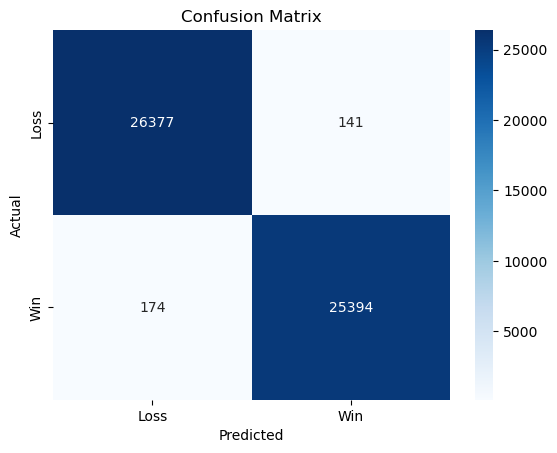

In [229]:
# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=result_decoder.values(), yticklabels=result_decoder.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Building the XGBoost Model**

In [230]:
model_xgb = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

In [231]:
# Predict on the test set
y_pred = model_xgb.predict(X_test)

### **XG Boost Model Evaluation**

In [232]:
# calculate model training accuracy
train_pred = model_xgb.predict(X_train)
accuracy = accuracy_score(y_train, train_pred)
print(f"Model Training Accuracy: {accuracy:.2f}")

Model Training Accuracy: 0.95


In [233]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.94


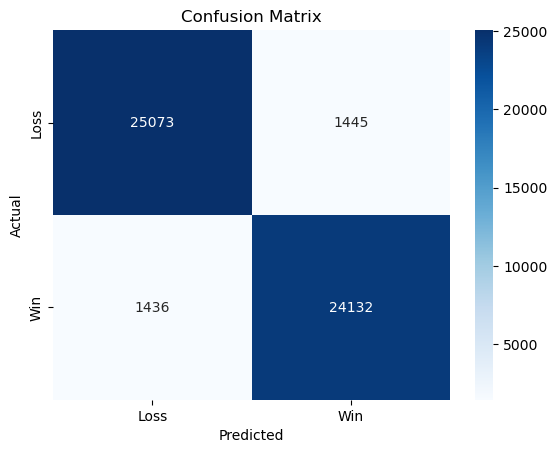

In [234]:
# CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=result_decoder.values(), yticklabels=result_decoder.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Prediction (Sample Input Using Random Forest)**

In [235]:
# sample input for prediction
sample_input = {
    'batting_team': 'Chennai Super Kings',
    'bowling_team': 'Mumbai Indians',
    
    'runs_left': 50,
    'balls_left': 30,
    'wickets_left': 7,
    'current_run_rate': 7.2,
    'required_run_rate': 10.0,
    'target': 158
}

# Create DataFrame from sample_input
sample_df = pd.DataFrame([sample_input])

In [236]:
# doing encoding using the similar keys used in the training data


# Add missing columns (from encoded_columns) and set to False/0
for col in encoded_columns:
    if col not in sample_df.columns:
        # If it's a bool column (team encoding), set to False, else 0
        if sample_df.dtypes.get(col, None) == 'bool' or col.startswith('batting_team_') or col.startswith('bowling_team_'):
            sample_df[col] = False
        else:
            sample_df[col] = 0

# Reorder columns to match training data
sample_df = sample_df[encoded_columns]

In [237]:
# Predict and decode
predicted_label = model.predict(sample_df)[0]
predicted_prob = model.predict_proba(sample_df)[0][1]

# Find the winning team based on prediction
if predicted_label == 1:
    winning_team = sample_input['batting_team']
else:
    winning_team = sample_input['bowling_team']

In [238]:
# Decode the predicted result
decoded_result = result_decoder[predicted_label]

# Print header
print("\n Match Outcome Prediction Summary")
print("===================================")
print(f" Predicted Result : {decoded_result}")

# Conditional display
if decoded_result == 'Win':
    print(f" Predicted Winner  : {winning_team}")
elif decoded_result == 'Loss':
    print(f" Predicted Loser   : {winning_team}")

# Get predicted probabilities for each class
probs = model.predict_proba(sample_df)[0]

# Find the index of class 1 (Win) in the model's classes
win_index = list(model.classes_).index(1)

# Extract the probability that the batting team will win
win_prob = probs[win_index]

print(f"\n Probability of {winning_team} Winning: {win_prob:.2%}")




 Match Outcome Prediction Summary
 Predicted Result : Loss
 Predicted Loser   : Mumbai Indians

 Probability of Mumbai Indians Winning: 18.00%


------

This above predicted reults shows that on the basis of Traget runs given by Chennai Super Kings in first inngs gave 158 runs target to Mumbai Indians and according to prediction  Mumbai Indians winning chnaces at this given instance of the match are very low.
The Match Happens Mumbai vs Chennai Super KingsIPL in 2014
at Sat 10 May 2014 12:00:00 PM (IST)



----

### **Senario 2: After First Innings Wining Team Predict based on both Teams Past Performances**

#### Data Manipulation and Feature Engineering 

In [239]:
 # seprate the data of first inngs from deliveries
first_innings = deliveries[deliveries["inning"] == 1].copy()

In [240]:
# creating a column which indicates if team1 won the match
matches["won"] = (matches["winner"] == matches["team1"]).astype(int)

In [241]:
# aggeragating the data of first inngs

agg_features = first_innings.groupby("match_id").agg(
    total_runs_1st_inns=("total_runs", "sum"), # total runs scored in the first innings
    wickets_1st_inns=("is_wicket", "sum"), # total wickets fallen in the first innings
    dot_balls=("total_runs", lambda x: (x == 0).sum()), # total dot balls in the first innings
    total_balls=("ball", "count"), # total balls bowled in the first innings
    powerplay_runs=("total_runs", lambda x: x[first_innings["over"] <= 6].sum()), # total runs scored in the powerplay overs
    death_overs_runs=("total_runs", lambda x: x[first_innings["over"] >= 16].sum()), # total runs scored in the death overs
    extras_given=("extra_runs", "sum")
).reset_index()

agg_features.head()

,match_id,total_runs_1st_inns,wickets_1st_inns,dot_balls,total_balls,powerplay_runs,death_overs_runs,extras_given
0,335982,222,3,36,124,68,64,17
1,335983,240,5,34,124,62,71,6
2,335984,129,8,54,122,44,23,7
3,335985,165,7,45,123,54,47,11
4,335986,110,10,62,118,45,28,10


In [242]:
# generating a column wich indicates dot balls ratio
agg_features["dot_ball_ratio"] = agg_features["dot_balls"] / agg_features["total_balls"]
agg_features.drop(columns=["dot_balls", "total_balls"], inplace=True)

agg_features.head()

,match_id,total_runs_1st_inns,wickets_1st_inns,powerplay_runs,death_overs_runs,extras_given,dot_ball_ratio
0,335982,222,3,68,64,17,0.29
1,335983,240,5,62,71,6,0.27
2,335984,129,8,44,23,7,0.44
3,335985,165,7,54,47,11,0.37
4,335986,110,10,45,28,10,0.53


### **Merging the new feature extracted from first innings with the matches DataFrame**

In [243]:

# 4. Merge match info with delivery dataset
df = matches.merge(agg_features, on="match_id")

df.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,super_over,umpire1,umpire2,won,total_runs_1st_inns,wickets_1st_inns,powerplay_runs,death_overs_runs,extras_given,dot_ball_ratio
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,N,Asad Rauf,RE Koertzen,0,222,3,68,64,17,0.29
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,N,MR Benson,SL Shastri,0,240,5,62,71,6,0.27
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,N,Aleem Dar,GA Pratapkumar,1,129,8,44,23,7,0.44
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,N,SJ Davis,DJ Harper,0,165,7,54,47,11,0.37
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,...,N,BF Bowden,K Hariharan,1,110,10,45,28,10,0.53


In [244]:
# 5. Add context columns
df["chasing_team"] = df["team2"]
df["bowling_team"] = df["team1"]

### **Team Strength Feature based on both Teams Past Performances**

In [245]:
# 6. Compute team strengths
matches["team1_win"] = (matches["team1"] == matches["winner"]).astype(int)
matches["team2_win"] = (matches["team2"] == matches["winner"]).astype(int)

team1_strength = matches.groupby("team1")["team1_win"].mean().reset_index().rename(
    columns={"team1": "team", "team1_win": "chasing_strength"})
df = df.merge(team1_strength, left_on="chasing_team", right_on="team", how="left").drop(columns=["team"])


### **H2H Winrate Feature based on both Teams Past Performances**

In [246]:
df["chasing_win"] = (df["chasing_team"] == df["winner"]).astype(int)

In [247]:
# Compute head-to-head total matches and wins for each team pairing
h2h_df = df.groupby(["chasing_team", "bowling_team"]).agg(
    total_matches=("match_id", "count"),
    wins=("chasing_win", "sum")
).reset_index()

# Calculate H2H win rate for the chasing team
h2h_df["h2h_winrate"] = h2h_df["wins"] / h2h_df["total_matches"]

# Merge winrate into the main model dataset
df = df.merge(
    h2h_df[["chasing_team", "bowling_team", "h2h_winrate"]],
    on=["chasing_team", "bowling_team"],
    how="left"
)

# Optional: fill missing H2H values with neutral 0.5
df["h2h_winrate"] = df["h2h_winrate"].fillna(0.5)

h2h_df.head(5)


,chasing_team,bowling_team,total_matches,wins,h2h_winrate
0,Chennai Super Kings,Delhi Capitals,13,8,0.62
1,Chennai Super Kings,Gujarat Titans,2,1,0.50
2,Chennai Super Kings,Kochi Tuskers Kerala,1,0,0.00
3,Chennai Super Kings,Kolkata Knight Riders,15,10,0.67
4,Chennai Super Kings,Mumbai Indians,15,7,0.47


### **last 5 matches win rate**

In [248]:
# 9. Recent form: Calculate the chasing team's win rate over their last 5 matches

# Sort the matches by team and date to maintain chronological order
df = df.sort_values(["chasing_team", "date"])

# Create a copy of relevant columns for recent form tracking
recent_form = df[["match_id", "chasing_team", "date", "chasing_win"]].copy()

# Calculate the rolling win rate for each chasing team over their last 5 matches (excluding the current match)
recent_form["chasing_recent_winrate"] = (
    recent_form.groupby("chasing_team")["chasing_win"]  # Group by team
    .shift()                                            # Shift to exclude the current match result
    .rolling(window=5)                                  # Use rolling window of 5 matches
    .mean()                                             # Calculate mean win rate
    .reset_index(drop=True)                             # Drop index to align with DataFrame
)

In [249]:
# Merge the recent form (last 5-match winrate) into the main modeling DataFrame using match_id
df = df.merge(
    recent_form[["match_id", "chasing_recent_winrate"]],
    on="match_id", how="left"
)


In [250]:
# check for any missing values in the df DataFrame
missing_values = df.isna().sum()
missing_values[missing_values > 0]

chasing_recent_winrate    60
dtype: int64

In [251]:
# Fill missing recent form
df["chasing_recent_winrate"] = df["chasing_recent_winrate"].fillna(
    df["chasing_recent_winrate"].median()
)

In [252]:
df.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,powerplay_runs,death_overs_runs,extras_given,dot_ball_ratio,chasing_team,bowling_team,chasing_strength,chasing_win,h2h_winrate,chasing_recent_winrate
0,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,62,71,6,0.27,Chennai Super Kings,Punjab Kings,0.59,1,0.57,0.40
1,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,...,43,62,4,0.35,Chennai Super Kings,Royal Challengers Bangalore,0.59,1,0.55,0.40
2,336005,2007/08,Jaipur,2008-05-04,League,Sohail Tanvir,Sawai Mansingh Stadium,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,...,41,13,7,0.53,Chennai Super Kings,Rajasthan Royals,0.59,0,0.42,0.40
3,336009,2007/08,Delhi,2008-05-08,League,MS Dhoni,Feroz Shah Kotla,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,...,59,48,12,0.21,Chennai Super Kings,Delhi Capitals,0.59,1,0.62,0.40
4,336018,2007/08,Mumbai,2008-05-14,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,...,36,54,12,0.44,Chennai Super Kings,Mumbai Indians,0.59,0,0.47,0.60


### **Venue Winrate**

In [253]:
# 8. Venue win rate
venue_df = df.groupby(["chasing_team", "venue"]).agg(
    venue_matches=("match_id", "count"),
    venue_wins=("chasing_win", "sum")
).reset_index()
venue_df["venue_winrate"] = venue_df["venue_wins"] / venue_df["venue_matches"]
df = df.merge(venue_df[["chasing_team", "venue", "venue_winrate"]],
              on=["chasing_team", "venue"], how="left")

venue_df.head(2)

,chasing_team,venue,venue_matches,venue_wins,venue_winrate
0,Chennai Super Kings,Arun Jaitley Stadium,2,1,0.50
1,Chennai Super Kings,"Arun Jaitley Stadium, Delhi",1,1,1.00


In [254]:
df.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,death_overs_runs,extras_given,dot_ball_ratio,chasing_team,bowling_team,chasing_strength,chasing_win,h2h_winrate,chasing_recent_winrate,venue_winrate
0,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,71,6,0.27,Chennai Super Kings,Punjab Kings,0.59,1,0.57,0.40,0.75
1,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,...,62,4,0.35,Chennai Super Kings,Royal Challengers Bangalore,0.59,1,0.55,0.40,0.50
2,336005,2007/08,Jaipur,2008-05-04,League,Sohail Tanvir,Sawai Mansingh Stadium,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,...,13,7,0.53,Chennai Super Kings,Rajasthan Royals,0.59,0,0.42,0.40,0.60
3,336009,2007/08,Delhi,2008-05-08,League,MS Dhoni,Feroz Shah Kotla,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,...,48,12,0.21,Chennai Super Kings,Delhi Capitals,0.59,1,0.62,0.40,0.80
4,336018,2007/08,Mumbai,2008-05-14,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,...,54,12,0.44,Chennai Super Kings,Mumbai Indians,0.59,0,0.47,0.60,0.55


### **Selecting Features**

In [255]:
features = df[[
    "chasing_team", "bowling_team", "venue",
    "target_runs", "total_runs_1st_inns", "dot_ball_ratio", "extras_given",
    "wickets_1st_inns", "chasing_strength", "h2h_winrate", "venue_winrate",
    "chasing_recent_winrate", 'won'
]]

features.head()

,chasing_team,bowling_team,venue,target_runs,total_runs_1st_inns,dot_ball_ratio,extras_given,wickets_1st_inns,chasing_strength,h2h_winrate,venue_winrate,chasing_recent_winrate,won
0,Chennai Super Kings,Punjab Kings,"Punjab Cricket Association Stadium, Mohali",241.00,240,0.27,6,5,0.59,0.57,0.75,0.40,0
1,Chennai Super Kings,Royal Challengers Bangalore,M Chinnaswamy Stadium,179.00,178,0.35,4,5,0.59,0.55,0.50,0.40,0
2,Chennai Super Kings,Rajasthan Royals,Sawai Mansingh Stadium,110.00,109,0.53,7,10,0.59,0.42,0.60,0.40,1
3,Chennai Super Kings,Delhi Capitals,Feroz Shah Kotla,188.00,187,0.21,12,5,0.59,0.62,0.80,0.40,0
4,Chennai Super Kings,Mumbai Indians,Wankhede Stadium,157.00,156,0.44,12,6,0.59,0.47,0.55,0.60,1


## **Random Forest**

### **Defining Features and Target**

In [256]:
X = features.drop(columns=['won'])
y = features['won']

### **Label Encoding of Categorical Features and Saving the Encoders**

In [257]:
# label encoding the categorical columns
le_team = LabelEncoder()
le_venue = LabelEncoder()

X["chasing_team"] = le_team.fit_transform(X["chasing_team"])
X["bowling_team"] = le_team.transform(X["bowling_team"])
X["venue"] = le_venue.fit_transform(X["venue"])


In [258]:
# Save mappings for decoding
team_mapping = dict(zip(le_team.classes_, le_team.transform(le_team.classes_)))
venue_mapping = dict(zip(le_venue.classes_, le_venue.transform(le_venue.classes_)))
reverse_team_mapping = {v: k for k, v in team_mapping.items()}
reverse_venue_mapping = {v: k for k, v in venue_mapping.items()}

### **Train-Test Split**

In [259]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [260]:
# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [261]:
# Predict on training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy    : {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy    : 0.7248


The trainig accuracy is higher than the test accuracy that means the model is overfitting which can be fixed by increasing the number of trees or reducing the complexity of the model (Hyperparameters Tuning).

In [262]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       110
           1       0.70      0.78      0.74       108

    accuracy                           0.72       218
   macro avg       0.73      0.73      0.72       218
weighted avg       0.73      0.72      0.72       218



### **Sample Input**

In [ ]:
# Create a sample match input using real encoded values
sample_input = {
    "chasing_team": "Mumbai Indians",
    "bowling_team": "Chennai Super Kings",
    "venue": "Wankhede Stadium",
    "target_runs": 158,
    "total_runs_1st_inns": 157,
    "dot_ball_ratio": 0.30,
    "extras_given": 12,
    "wickets_1st_inns": 6,
    "chasing_strength": 0.62,
    "h2h_winrate": 0.55,
    "venue_winrate": 0.60,
    "chasing_recent_winrate": 0.60
}

In [264]:

# Use already encoded input directly
encoded_sample = {
    "chasing_team": team_mapping.get(sample_input["chasing_team"], -1),
    "bowling_team": team_mapping.get(sample_input["bowling_team"], -1),
    "venue": venue_mapping.get(sample_input["venue"], -1),
    "target_runs": sample_input["target_runs"],
    "total_runs_1st_inns": sample_input["total_runs_1st_inns"],
    "dot_ball_ratio": sample_input["dot_ball_ratio"],
    "extras_given": sample_input["extras_given"],
    "wickets_1st_inns": sample_input["wickets_1st_inns"],
    "chasing_strength": sample_input["chasing_strength"],
    "h2h_winrate": sample_input["h2h_winrate"],
    "venue_winrate": sample_input["venue_winrate"],
    "chasing_recent_winrate": sample_input["chasing_recent_winrate"]
}

# Create input DataFrame
input_df = pd.DataFrame([encoded_sample])



In [265]:
# Predict using the trained classifier
prediction = clf.predict(input_df)[0]
prediction_prob = clf.predict_proba(input_df)[0][prediction]
predicted_team = sample_input["chasing_team"] if prediction == 1 else sample_input["bowling_team"]

In [266]:
# Interpret model output
chasing_team = sample_input["chasing_team"]
bowling_team = sample_input["bowling_team"]

predicted_winner = chasing_team if prediction == 1 else bowling_team
predicted_loser = bowling_team if prediction == 1 else chasing_team

print("\n Match Outcome Prediction Summary")
print("===================================")
print(f" Predicted Winner     : {predicted_winner}")
print(f" Predicted Loser      : {predicted_loser}")
print(f" Model Prediction     : {prediction}  (1 = chasing team wins, 0 = loses)")
print(f" Confidence (Win %)   : {prediction_prob * 100:.2f}%")

# Optional: clarify for the chasing team
if prediction == 1:
    print(f"\n The chasing team '{chasing_team}' is expected to win.")
else:
    print(f"\n The chasing team '{chasing_team}' is expected to lose.")



 Match Outcome Prediction Summary
 Predicted Winner     : Mumbai Indians
 Predicted Loser      : Chennai Super Kings
 Model Prediction     : 0  (1 = chasing team wins, 0 = loses)
 Confidence (Win %)   : 74.00%

 The chasing team 'Chennai Super Kings' is expected to lose.


----


----

### **Hyperparameter Tuning**

In [267]:
# features selection
X = features.drop(columns=['won']).copy()
y = features['won'].copy()

In [268]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [269]:
# label encoding the categorical columns
le_team  = LabelEncoder()
le_venue = LabelEncoder()

teams_union = pd.unique(pd.concat([X_train['chasing_team'], X_train['bowling_team']]))
le_team.fit(teams_union)
le_venue.fit(X_train['venue'])

LabelEncoder()

In [270]:
def safe_transform(le, s):
    unknown = set(s.unique()) - set(le.classes_)
    if unknown:
        raise ValueError(f"Unseen labels: {unknown}")
    return le.transform(s)

for df in (X_train, X_test):
    df['chasing_team_enc'] = safe_transform(le_team,  df['chasing_team'])
    df['bowling_team_enc'] = safe_transform(le_team,  df['bowling_team'])
    df['venue_enc']        = safe_transform(le_venue, df['venue'])

X_train = X_train.drop(columns=['chasing_team','bowling_team','venue'])

X_test  = X_test.drop(columns=['chasing_team','bowling_team','venue'])

In [271]:
# model building with hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

from scipy.stats import randint


param_dist = {
    "n_estimators": randint(300, 900),
    "max_depth": randint(5, 30),
    "min_samples_split": randint(2, 12),
    "min_samples_leaf": randint(1, 8),
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}

In [272]:
# Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=25, cv=cv,
    scoring="accuracy", n_jobs=-1, random_state=42, verbose=0
)
search.fit(X_train, y_train)
best_rf = search.best_estimator_

print("Best params:", search.best_params_)

Best params: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 697}


In [273]:
def evaluate_model(y_true, y_pred):
    """Return metrics DataFrame and confusion matrix DataFrame."""
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)

    metrics_df = pd.DataFrame({
        "Accuracy": [acc],
        "Precision": [prec],
        "Recall": [rec],
        "F1-score": [f1]
    })


    return metrics_df.round(3)

In [274]:
# --------- TRAIN evaluation ---------
train_metrics = evaluate_model(y_train, best_rf.predict(X_train))
print("TRAIN Metrics:\n", train_metrics.to_string(index=False))


TRAIN Metrics:
  Accuracy  Precision  Recall  F1-score
     0.79       0.84    0.73      0.78


In [275]:
# --------- TEST evaluation ---------
test_metrics = evaluate_model(y_test, best_rf.predict(X_test))
print("TEST Metrics:\n", test_metrics.to_string(index=False))


TEST Metrics:
  Accuracy  Precision  Recall  F1-score
     0.75       0.79    0.70      0.74


---
As now we can see clearly the difference between the training and testing metrics are not too much which means the model is not overfitting or underfitting and generalizing well on unseen data.

---

### **Applyig XGBoost**

In [276]:
# Data Split 
X = features.drop(columns=['won']).copy()
y = features['won'].copy()

In [277]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [278]:
# label encoding the categorical columns
teams_union = pd.unique(pd.concat([X_train['chasing_team'], X_train['bowling_team']], ignore_index=True))
le_team.fit(teams_union)
le_venue.fit(X_train['venue'])

def safe_transform(le, s):
    unknown = set(s.unique()) - set(le.classes_)
    if unknown:
        raise ValueError(f"Unseen labels: {unknown}")
    return le.transform(s)

for df in (X_train, X_test):
    df['chasing_team_enc'] = safe_transform(le_team,  df['chasing_team'])
    df['bowling_team_enc'] = safe_transform(le_team,  df['bowling_team'])
    df['venue_enc']        = safe_transform(le_venue, df['venue'])

X_train = X_train.drop(columns=['chasing_team','bowling_team','venue'])
X_test  = X_test.drop(columns=['chasing_team','bowling_team','venue'])


In [279]:
# model building with XGBoost
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [280]:
# Evaluation Function
def evaluate_model(y_true, y_pred, split_name):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)

    metrics_df = pd.DataFrame({
        "Accuracy": [acc],
        "Precision": [prec],
        "Recall": [rec],
        "F1-score": [f1]
    }, index=[split_name])

    print("="*50)
    print(f"{split_name} Evaluation Metrics")
    print("="*50)
    print(metrics_df.round(3).to_string())
    print("="*50 + "\n")


In [281]:
# Run reports 
y_train_pred = xgb.predict(X_train)
y_test_pred  = xgb.predict(X_test)

evaluate_model(y_train, y_train_pred, "TRAIN")
evaluate_model(y_test,  y_test_pred,  "TEST")

TRAIN Evaluation Metrics
       Accuracy  Precision  Recall  F1-score
TRAIN      1.00       1.00    1.00      1.00

TEST Evaluation Metrics
      Accuracy  Precision  Recall  F1-score
TEST      0.68       0.69    0.68      0.69



---

As the training accuracy metrics are very higher then the test accuracy metrics which means the model is overfitting and not generalizing well on unseen data.

---

### **XGBoost Hyperparameter Tuning**

In [282]:

# train-test split
X = features.drop(columns=['won']).copy()
y = features['won'].copy()


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [283]:

# label encoding the categorical columns
le_team  = LabelEncoder()
le_venue = LabelEncoder()
teams_union = pd.unique(pd.concat([X_train['chasing_team'], X_train['bowling_team']], ignore_index=True))
le_team.fit(teams_union)
le_venue.fit(X_train['venue'])

def safe_transform(le, s):
    return le.transform(s)

for df in (X_train, X_test):
    df['chasing_team_enc'] = safe_transform(le_team,  df['chasing_team'])
    df['bowling_team_enc'] = safe_transform(le_team,  df['bowling_team'])
    df['venue_enc']        = safe_transform(le_venue, df['venue'])

X_train = X_train.drop(columns=['chasing_team','bowling_team','venue'])
X_test  = X_test.drop(columns=['chasing_team','bowling_team','venue'])


In [284]:

# Further split training set into training and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42, stratify=y_train
)

# hyperparameter tuning with RandomizedSearchCV
xgb_base = XGBClassifier(
    objective="binary:logistic",
    tree_method="hist",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": randint(400, 800),           # fewer trees
    "max_depth": randint(2, 5),                  # shallower
    "learning_rate": uniform(0.02, 0.06),        # small LR
    "subsample": uniform(0.6, 0.2),              # 0.6–0.8
    "colsample_bytree": uniform(0.6, 0.2),       # 0.6–0.8
    "min_child_weight": randint(5, 15),          # stricter split
    "gamma": uniform(0.2, 0.4),                  # 0.2–0.6
    "reg_lambda": uniform(5.0, 10.0),            # stronger L2
    "reg_alpha": uniform(1.0, 4.0)               # stronger L1
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=20,
    scoring="accuracy",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [285]:
# Fit the RandomizedSearchCV
search.fit(X_train, y_train)

# Best estimator from the search
best_xgb = search.best_estimator_
print("Best CV Accuracy:", round(search.best_score_, 4))
print("Best Params:", search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CV Accuracy: 0.7396
Best Params: {'colsample_bytree': 0.6176985004103839, 'gamma': 0.2783931449676581, 'learning_rate': 0.022713637334632285, 'max_depth': 2, 'min_child_weight': 6, 'n_estimators': 766, 'reg_alpha': 4.314950036607717, 'reg_lambda': 8.567533266935893, 'subsample': 0.6561869019374761}


In [286]:

# fitting the best model on the entire training data 
best_xgb.fit(X_train, y_train)

# Evaluation Function
def evaluate_metrics(y_true, y_pred):
    return pd.DataFrame({
        "Accuracy":  [accuracy_score(y_true, y_pred)],
        "Precision": [precision_score(y_true, y_pred, zero_division=0)],
        "Recall":    [recall_score(y_true, y_pred, zero_division=0)],
        "F1-score":  [f1_score(y_true, y_pred, zero_division=0)]
    })

In [287]:
# train set evaluation
y_train_pred = best_xgb.predict(X_train)
print("\n" + "="*60)
print("TRAIN Metrics")
print("="*60)
print(evaluate_metrics(y_train, y_train_pred).round(3).to_string(index=False))


TRAIN Metrics
 Accuracy  Precision  Recall  F1-score
     0.78       0.79    0.76      0.78


In [288]:
# test set evaluation
y_test_pred = best_xgb.predict(X_test)
print("\n" + "="*60)
print("TEST Metrics")
print("="*60)
print(evaluate_metrics(y_test, y_test_pred).round(3).to_string(index=False))


TEST Metrics
 Accuracy  Precision  Recall  F1-score
     0.73       0.75    0.70      0.73
